In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from yellowbrick.cluster import KElbowVisualizer

sns.set_style('darkgrid')
sns.set_palette('husl')

In [6]:
## load the data set

data = load_iris(as_frame=True)['data']
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
data.rename(columns={
    'sepal length (cm)': 'sepal_length',
    'sepal width (cm)' : 'sepal_width',
    'petal length (cm)': 'petal_length',
    'petal width (cm)' : 'petal_width'
}, inplace = True)

### How Kmeans works:

1. Randomly select n number of centroids based on the desired cluster.
2. Compute the inertia i.e The sum of squares of distance between x and each centroid.
3. Assign x to the centroid corresponding with the minimum inertia
4. Compute the new centroid 
5. Repeat step one to 4 till the changes in inertia becomes very small i.e centroids are not changing anymore.

In [8]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Steps in Training Kmeans

1. Initialize the model.
2. Fit the model on the X
3. Observe the elbow curve for optimal K
4. Adjust the the number of clusters to match the elbow curve.
5. Get clusters

In [29]:
# model training.

model = KMeans(n_clusters=3, n_init='auto') # init the model
model.fit(data) # fit the model to the data
preds = model.labels_ # get prediction

score = silhouette_score(X=data, labels=preds)
print(score)

0.5528190123564102


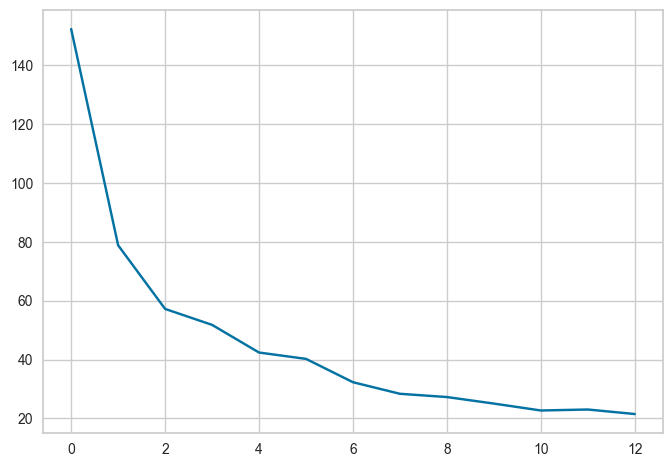

In [19]:
# manually generate elbow curve.

inertia = []
for cluster in range(2, 15):
    model = KMeans(n_clusters=cluster, n_init='auto')
    model.fit(data)
    inertia.append(model.inertia_)
    
plt.plot(list(range(13)), inertia)

#### Standard way of getting elbow curve

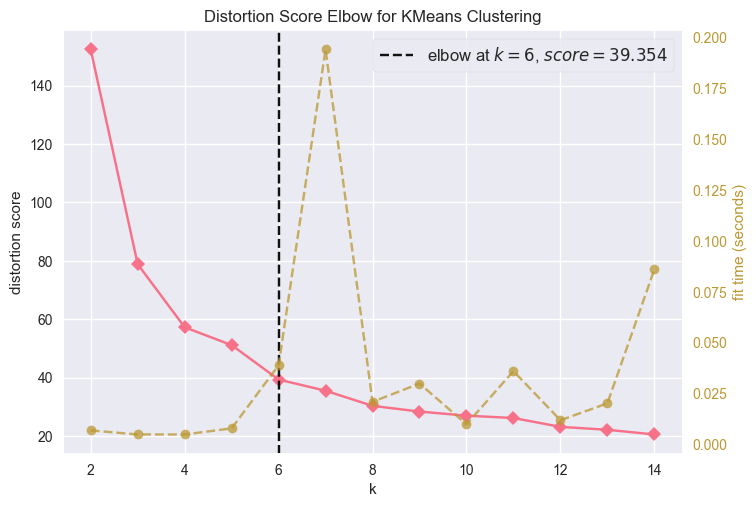

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
# firstly install yellowbrick with !pip install yellowbrick

kmeans_model = KMeans()
visualizer = KElbowVisualizer(estimator=kmeans_model, k=(2, 15))
visualizer.fit(data)
visualizer.show()

In [ ]:
# visualize the clusters.
import plotly.express as px

data['predicted_cluster'] = preds
px.scatter_3d(data_frame=data, x='sepal_length',
              y = 'sepal_width',z = 'petal_length',
              color = 'predicted_cluster')

### assignment

Perform clustering analysis on plotly's tips dataset

In [ ]:
px.data.tips()